In [2]:
import pickle
import numpy as np
import random
from tqdm import tqdm

import matplotlib.pyplot as plt
from IPython.display import Image
plt.rcParams['figure.figsize'] = [15, 15]

import torch
import torchvision
import torch.nn.functional as F
from torch.utils.data import DataLoader


#from utils import aboutCudaDevices
from dataset_mod import MyDataset, default_loader
#from solver_mod import reconstruction_loss, kl_divergence, to_var
#from model_mod import conv_VAE_32, conv_AE

#from visuals_mod import traverse_z, plotsave_tests


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [142]:
image_paths = "/Users/riccardoconci/Desktop/test_img_2/digts/train/orig/"
target_paths = "/Users/riccardoconci/Desktop/test_img_2/digts/train/inverse/"
#image_paths = "/Users/riccardoconci/Desktop/orig/"
#target_paths = "/Users/riccardoconci/Desktop/orig/"

In [143]:
dset = MyDataset
train_data = dset(image_paths,target_paths, image_size= 32)
#pickle.dump( train_data, open( "train_data.p", "wb" ) )



In [150]:
sample = train_data.__getitem__(4)

In [151]:
sample["y"][0,:,:][sample["y"][0,:,:] == torch.median(sample["y"][0,:,:])] = 0.5

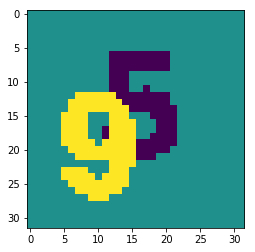

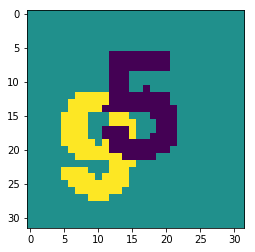

In [152]:
plt.imshow(sample["x"][0,:,:])
plt.figure()
plt.imshow(sample["y"][0,:,:])
plt.show()

In [63]:
batch_size= 256
num_workers = 4
train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          shuffle=True,
                          num_workers=num_workers,
                          pin_memory=False,
                          drop_last=False)

In [250]:
vae = conv_VAE_32(z_dim=20 )
optimizer = torch.optim.Adam(vae.parameters(), lr=1e-3)
#scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [270]:
#select train/test image to traverse 
dset_dir = "/Users/riccardoconci/Desktop/2_dig_fixed_random_bw/digts/"
test_image_paths = os.path.join(dset_dir + "test/orig/")
test_target_paths = os.path.join(dset_dir + "test/inverse/")
image_size = 32
dset = MyDataset
test_data = dset(test_image_paths,test_target_paths, image_size= image_size)
example_id = test_data.__getitem__(0)


In [299]:
y_test_sample = example_id['y'].to(device)
y_test_sample = y_test_sample.detach()

In [302]:
torchvision.utils.save_image(y_test_sample, 'target.png')

In [303]:
plt.imsave('target.svg',y_test_sample[0,:,:] )

In [295]:
traverse_z(vae, example_id)


torch.Size([1, 20])
torch.Size([400, 20])
